<a href="https://colab.research.google.com/github/MahisaAghisni/PCVK_GENAP_2023/blob/main/week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os 
import glob

height,widht dan depth pada gambar 512 512 3


<BarContainer object of 256 artists>

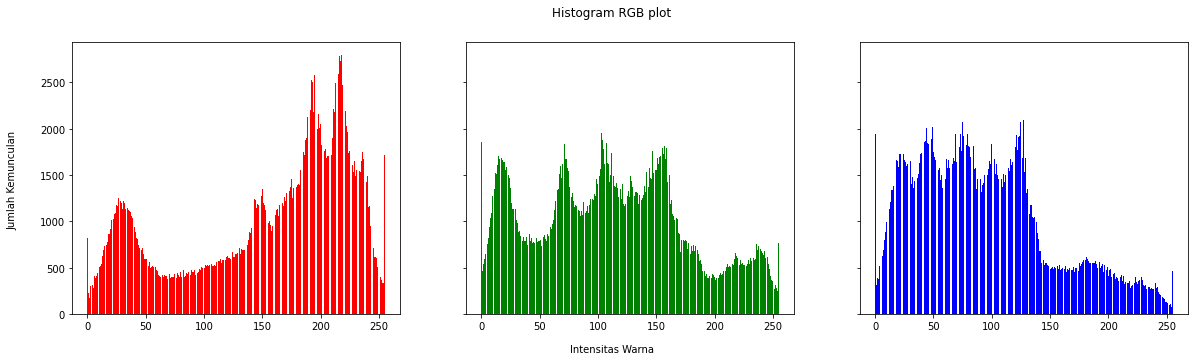

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena.jpg')

height, width, depth = np.shape(img)#Mengambil tinggi, lebar, dan kedalaman citra

names = np.arange(256)#Membuat sebuah array NumPy yang terdiri dari bilangan 0 sampai 255 (256 elemen) sebagai nama untuk sumbu x dari histogram.

#Membuat sebuah array NumPy yang terdiri dari bilangan 0 sampai 255 (256 elemen) sebagai nama untuk sumbu x dari histogram.
red = [0]*256
green = [0]*256
blue = [0]*256

# Menghitung histogram dari gambar menggunakan perulangan for. Setiap kali sebuah piksel diproses, nilai intensitas warna merah, hijau, dan biru dari piksel tersebut ditambahkan satu di array yang sesuai.
for y in range(height):
  for x in range(width):
    red[img[y][x][2]] += 1 # += digunakan untuk menambahkan nilai 1 pada elemen array yangmana untuk mengindikasikan bahwa nilai 100 muncul satu kali pada gambar
    green[img[y][x][1]] += 1
    blue[img[y][x][0]] += 1

# Membuat area subplots
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)

fig.suptitle('Histogram RGB plot')
fig.text(0.08, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Intensitas Warna', ha='center')

print('height,widht dan depth pada gambar' , height, width,depth)

# Membuat histogram untuk intensitas warna merah, hijau, dan biru pada subplot pertama, kedua, dan ketiga masing-masing.
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

NO 4

Text(0.5, 1.0, 'Blue\xa0channel')

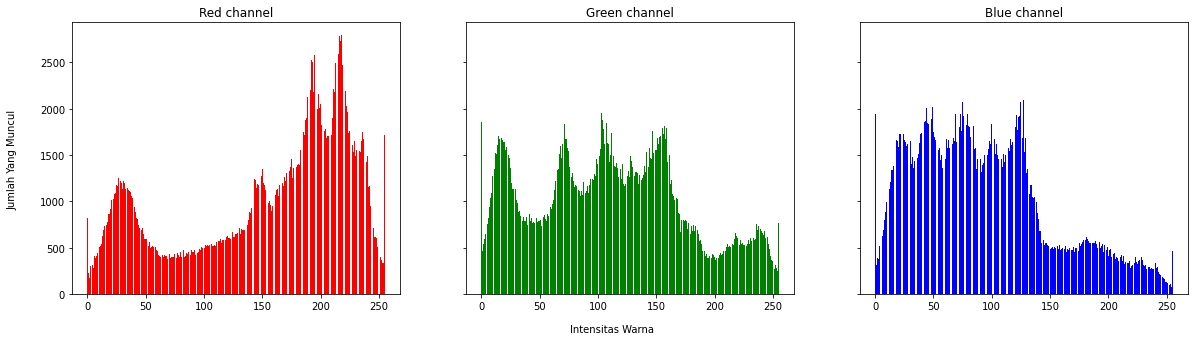

In [ ]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena.jpg')
height, width, depth = np.shape(img)
names = np.arange(256)

red_hist = [0]*256
green_hist = [0]*256
blue_hist = [0]*256

# Perhitungan histogram untuk beberapa channel menggunakan fungsi np.histogram 
# bins yakni jumlah level intensitas warna yang ingin dianalisis dalam histogram
# range menentukan rentang nilai intensitas warna yang ingin dianalisis dalam histogram
red_hist,_ = np.histogram(img[:, :, 2], bins=256, range=(0, 256))
green_hist,_ = np.histogram(img[:, :, 1], bins=256, range=(0, 256))
blue_hist,_ = np.histogram(img[:, :, 0], bins=256, range=(0, 256))

# Membuat area subplots
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)

# Plot histograms
axs[0].bar(names, red_hist, color='red')
axs[1].bar(names, green_hist, color='green')
axs[2].bar(names, blue_hist, color='blue')

# Set judul dan label
fig.text(0.08, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Intensitas Warna', ha='center')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')

NO 5

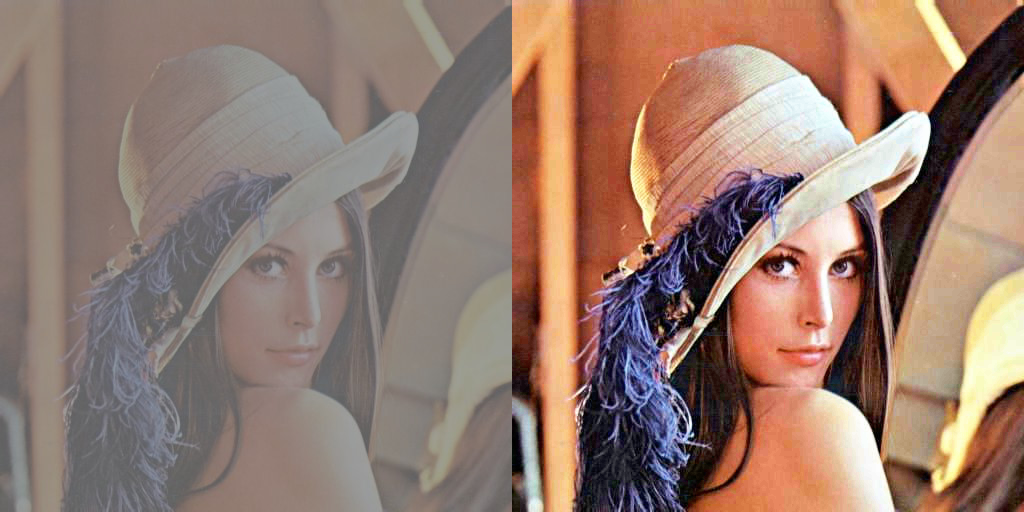

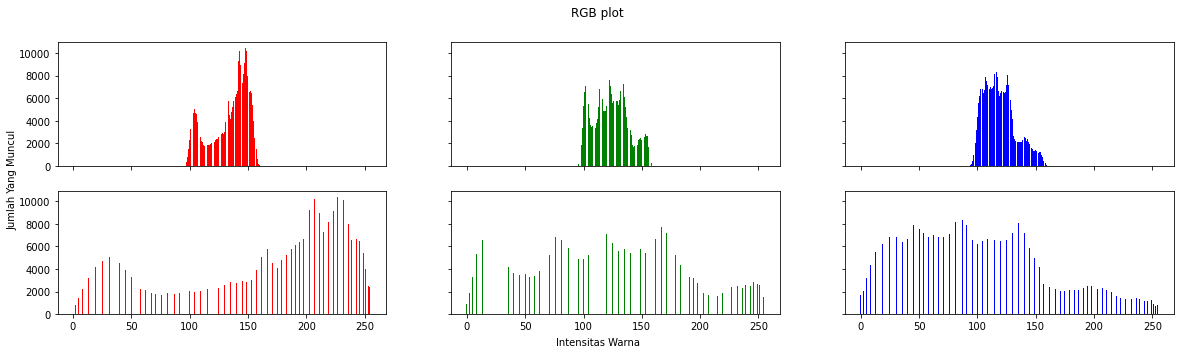

In [ ]:
img1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena_lc.jpg') 
def histog(img1): #funsgi untuk untuk menghitung histogram dari gambar.
  height, width, depth = np.shape(img1) #np.shape untuk mengetahui dimensi dari gambar.
  ax = np.zeros((3,256)) #Membuat matriks kosong ax dengan ukuran (3,256) untuk menampung histogram untuk setiap channel RGB.
  for y in range(0,height) :  #Melakukan perulangan untuk setiap piksel dalam gambar, dan menambahkan 1 ke elemen yang sesuai dalam matriks ax.
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1 
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1 
  return ax

real_hist = histog(img1)

img_array = np.asarray(img1) #Mengubah gambar menjadi array numpy 

histogram_array = np.bincount(img_array.flatten(), minlength=256) #Menghitung histogram gambar 

num_pixels = np.sum(histogram_array) #Menghitung jumlah piksel
histogram_array = histogram_array/num_pixels #Memperbarui array histogram dengan membaginya dengan jumlah piksel dalam gambar untuk mendapatkan histogram relatif.
chistogram_array = np.cumsum(histogram_array) #Menghitung cumulative sum dari histogram relatif untuk digunakan dalam equalization.
transform_map = np.floor(255 * chistogram_array). astype (np.uint8) # Mengalikan cumulative sum dengan 255 dan membulatkan ke bawah untuk mendapatkan transformasi mapping untuk equalization.
img_list = list(img_array.flatten())#Membuat daftar piksel gambar menjadi satu dimensi.
eq_img_list = [transform_map[p] for p in img_list] #Membuat daftar piksel gambar baru dengan mengubah nilai piksel gambar asli menggunakan transformasi mapping dari equalization.
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) #Membentuk array piksel gambar baru dengan menggunakan array piksel gambar baru yang sudah dibentuk sebelumnya dan bentuk gambar asli.
img2 = eq_img_array
equal_histo = histog(img2)
final_frame = cv.hconcat((img1, img2)) 
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) #Mengecek apakah citra yang diberikan merupakan citra grayscale atau bukan dengan membandingkan apakah nilai masing-masing channel warna (blue, green, red) sama atau tidak
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, real_hist[2], color='red') 
  axs[0,1].bar(names, real_hist[1], color='green') 
  axs[0,2].bar(names, real_hist[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, real_hist[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')


NO 6

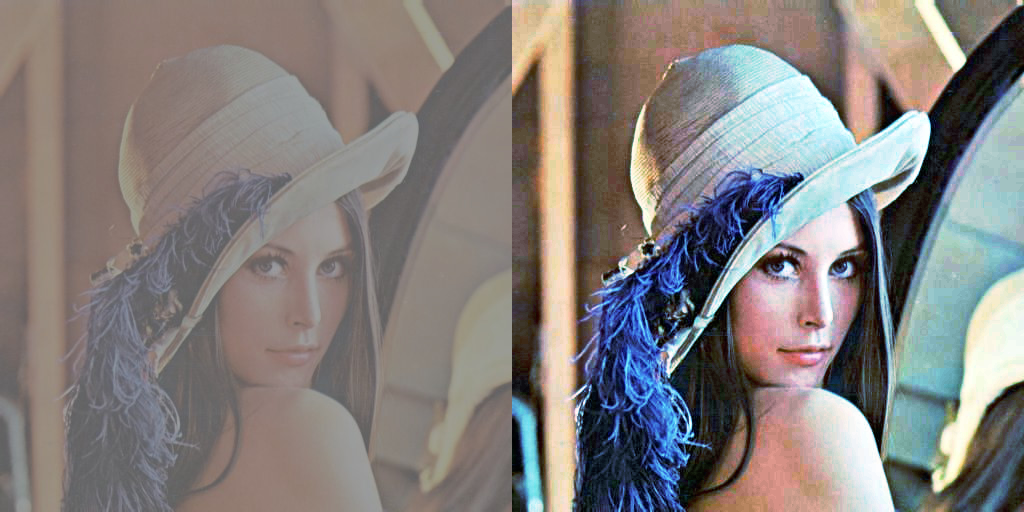

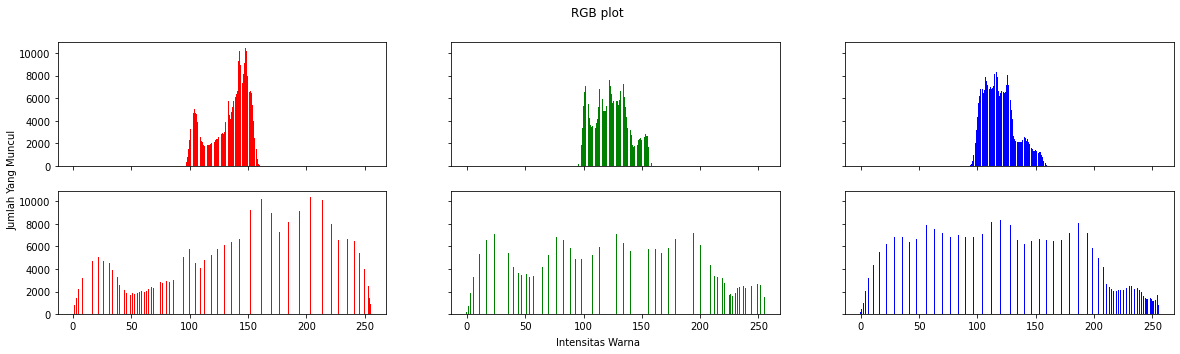

In [ ]:
channels = cv.split(img1) #memecah citra menjadi tiga saluran warna
eq_channels = [] #membuat list kosong untuk menampung citra hasil ekualisasi histogram pada masing-masing saluran warna.
for ch, color in zip(channels, ["r", "g", "b"]):#melakukan loop sebanyak tiga kali, dan ch  menyimpan setiap saluran warna yang diekstrak dari citra dan color sebagai nama warna saluran warna yang bersesuaian.
  eq_channels.append(cv.equalizeHist(ch)) #menambahkan citra hasil ekualisasi histogram dari setiap saluran warna
eq_image = cv.merge(eq_channels)#menggabungkan tiga citra hasil ekualisasi histogram
equal_histo = histog(eq_image) #menghitung histogram citra hasil ekualisasi histogram.

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) #Mengecek apakah citra yang diberikan merupakan citra grayscale atau bukan dengan membandingkan apakah nilai masing-masing channel warna (blue, green, red) sama atau tidak
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, real_hist[2], color='red') 
  axs[0,1].bar(names, real_hist[1], color='green') 
  axs[0,2].bar(names, real_hist[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Yang Muncul', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, real_hist[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

NO 7

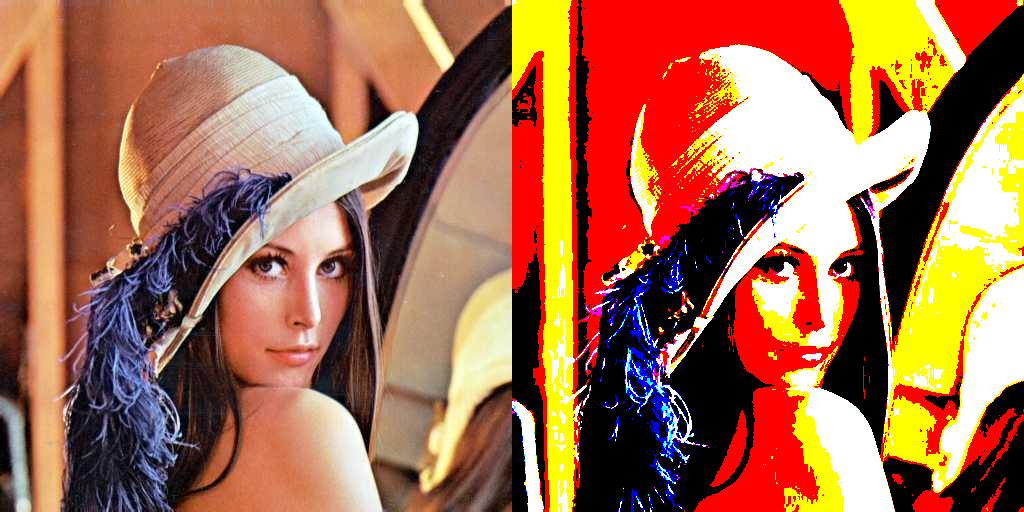

In [ ]:
def warnaTerdekat (r, g, b): #merepresentasikan nilai dari warna rgb
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1 #nilai jarak Euclidean maksimum dan memastikan bahwa jarak antara warna yang sedang dicari dengan warna dalam palet tidak akan melebihi nilai minDistance.
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]] #mendefinisikan 8 warna pada palet dan digunakan sebagai warna yang paling mendekati warna piksel pada gambar yang diolah
  for i in range(len(warnaPallette)): #melakukan perulangan untuk mengakses setiap warna dalam palet 
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff #menghitung jarak Euclidean
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])# mengakases nilai piksel
    img_8[y, x] = warnaPallette[baru]
    
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

NO 8

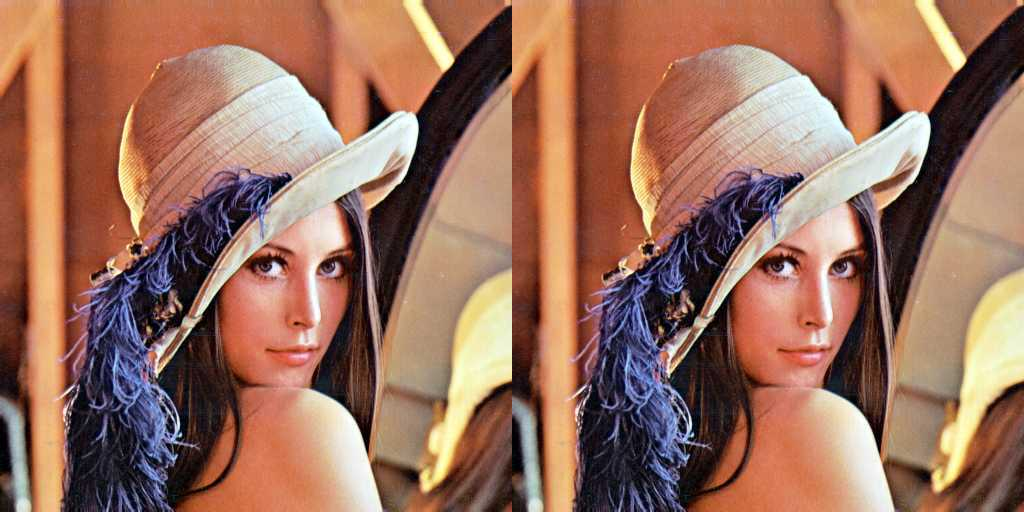

In [ ]:
from PIL import Image

# Load image and convert it to RGB using Floyd-Steinberg dithering
imageConvert = Image.open('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena2.jpg')

# Load the original image
ImageOriginal = cv.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena.jpg')

# Load the dithered image
ImageDithered = cv.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena2.jpg')

# Display the original and dithered images
final_frame = cv.hconcat((ImageOriginal, ImageDithered))
cv2_imshow(final_frame)

NO 9

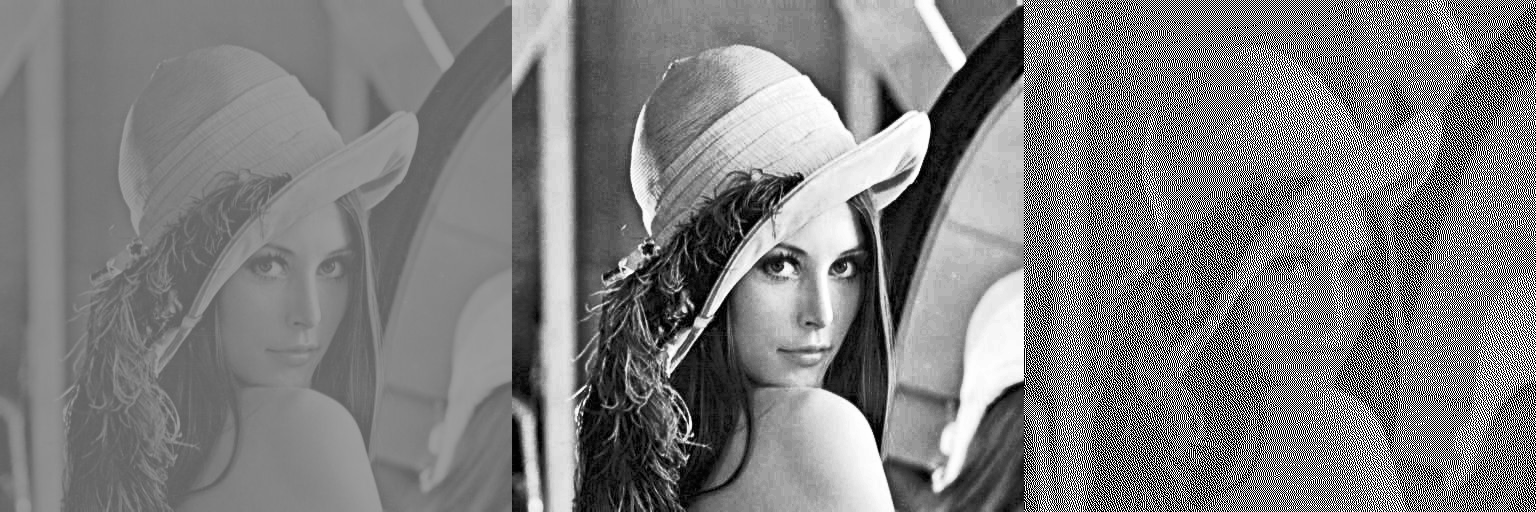

In [ ]:
from PIL import Image
import cv2

Image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena_lc.jpg')

FloydSteinberg = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)

def histog(img):
    height, width = img.shape
    hist = np.zeros(256)
    for y in range(height):
        for x in range(width):
            pixel = img[y, x]
            hist[pixel] += 1
    return hist

def equalize_histogram(img):
    height, width = img.shape #Mengambil dimensi gambar untuk digunakan pada iterasi berikutnya.
    hist = histog(img)
    cdf = np.cumsum(hist)#Menghitung kumulatif histogram.
    cdf_normalized = cdf / (height*width)#Normalisasi kumulatif histogram dengan membaginya dengan jumlah pixel pada gambar.
    transform_map = np.floor(255 * cdf_normalized).astype(np.uint8)#Membuat peta transformasi dengan memetakan nilai piksel pada gambar yang lama ke nilai piksel yang baru.
    img_eq = np.zeros((height, width), dtype=np.uint8) #Membuat gambar baru yang akan menampung gambar hasil ekualisasi histogram.
    for y in range(height):# Iterasi pada setiap piksel pada gambar lama, kemudian mengganti nilai piksel tersebut pada gambar baru dengan menggunakan nilai piksel yang baru pada peta transformasi.
        for x in range(width):
            img_eq[y, x] = transform_map[img[y, x]]
    return img_eq


# implementasikan proses dithering Floyd and Steinberg
Height = FloydSteinberg.shape[0]
Width = FloydSteinberg.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = FloydSteinberg[y, x]
        new_value = 0 
        if (old_value > 128) : #jika nilai old_value lebih besar dari 128, new_value akan diatur sebagai 255
            new_value = 255

        FloydSteinberg[y, x] = new_value

        Error = old_value - new_value
        #Pada setiap piksel tersebut, nilai piksel dihitung kembali dengan memperhatikan error dari piksel sebelumnya dan koefisien tertentu (7/16, 3/16, 5/16, dan 1/16) yang sudah ditentukan.
        if (x<Width-1): #piksel bukan berada di tepi kanan gambar dan langkah selanjutnya akan dilakukan untuk piksel di sebelah kanan.
            NewNumber = FloydSteinberg[y, x+1] + Error * 7 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y, x+1] = NewNumber

        if (x>0 and y<Height-1):#piksel tidak berada di tepi kiri atau bawah gambar dan langkah selanjutnya akan dilakukan untuk piksel di sudut kiri bawah.
            NewNumber = FloydSteinberg[y+1, x-1] + Error * 3 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x-1] = NewNumber

        if (y<Height-1): #piksel tidak berada di tepi bawah gambar dan langkah selanjutnya akan dilakukan untuk piksel di bawah.
            NewNumber= FloydSteinberg[y+1, x] + Error * 5 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x] = NewNumber

        if (y<Height-1 and x<Width-1): #piksel tidak berada di tepi kanan atau bawah gambar dan langkah selanjutnya akan dilakukan untuk piksel di sudut kanan bawah.
            NewNumber = FloydSteinberg[y+1, x+1] + Error * 1 / 16
            if (NewNumber>255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x+1] = NewNumber


img_gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img_eq = equalize_histogram(img_gray)

final_frame = cv.hconcat((img_gray, img_eq, FloydSteinberg))
cv2_imshow(final_frame)

Perbaikan no 8

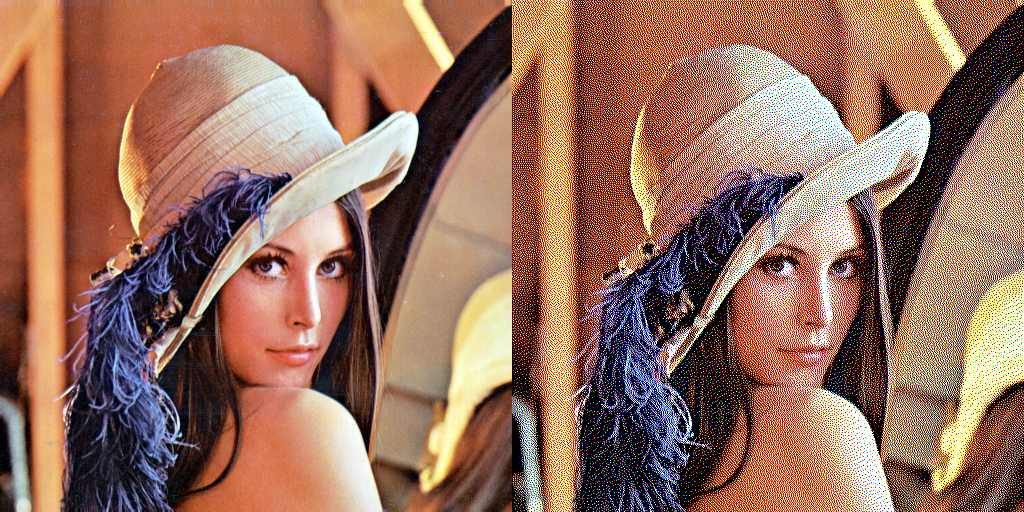

In [ ]:
from google.colab.patches import cv2_imshow

image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Semester 6/Images/lena.jpg')
b, g, r = cv.split(image)

# menerapkan dithering ke chanel
for channel in [b, g, r]:
    height, width = channel.shape

    # inisialisasi image
    new_channel = np.zeros((height, width), dtype=np.uint8)

    for y in range(height):
        for x in range(width):
            old_value = channel[y, x]
            new_value = 0

            if old_value > 128:
                new_value = 255

            channel[y, x] = new_value

            error = old_value - new_value

            if x < width - 1:
                new_number = channel[y, x + 1] + error * 7 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y, x + 1] = new_number

            if x > 0 and y < height - 1:
                new_number = channel[y + 1, x - 1] + error * 3 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x - 1] = new_number

            if y < height - 1:
                new_number = channel[y + 1, x] + error * 5 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x] = new_number

            if y < height - 1 and x < width - 1:
                new_number = channel[y + 1, x + 1] + error * 1 / 16
                if new_number > 255:
                    new_number = 255
                elif new_number < 0:
                    new_number = 0
                channel[y + 1, x + 1] = new_number

    # Store dithered channel in new image
    new_channel = channel

# Merge channels into final image
new_image = cv.merge([b, g, r])

# Display original and dithered images

final_frame = cv.hconcat((image, new_image))
cv2_imshow(final_frame)